In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Попробуем разные варианты загрузки:

# Вариант 1: Указать правильный разделитель (если это не запятая)
try:
    df = pd.read_csv('HH_data_DE3.csv', sep=';')  # если разделитель точка с запятой
except:
    # Вариант 2: Игнорировать ошибки парсинга (пропускать "битые" строки)
    df = pd.read_csv('HH_data_DE3.csv', error_bad_lines=False)  # для старых версий pandas
    # Для новых версий pandas:
    # df = pd.read_csv('HH_data_DE3.csv', on_bad_lines='skip')

# Вариант 3: Указать кодировку (если файл не UTF-8)
# df = pd.read_csv('HH_data_DE3.csv', encoding='cp1251')  # для Windows-1251

# Вариант 4: Пропустить первые строки, если в них мусор
# df = pd.read_csv('HH_data_DE3.csv', skiprows=1)

# Проверяем результат
df

,archived,area_name,direction,employer_name,level,name,published_at,url,vacancy_id,employer_id,salary_from,salary_to,Salary Gross,query_string,type,address_lat,address_lng,Avg/median sallary
0,0,Алматы,Analytics,Спортмастер,NaN,Старший аналитик SQL (анализ промо),22.09.2023 12:00:17,https://hh.ru/vacancy/87199951,87199951,2343.0,NaN,NaN,NaN,"""Python"" AND ""data"" AND ""анализ""",Навык,NaN,NaN,NaN
1,0,Алматы,Analytics,Спортмастер,Линейный специалист,Старший аналитик SQL (анализ промо),22.09.2023 12:00:17,https://hh.ru/vacancy/87199951,87199951,2343.0,NaN,NaN,NaN,"""Аналитик данных"" OR ""Data analyst""",Профессия,NaN,NaN,NaN
2,0,Алматы,Analytics,Спортмастер,Линейный специалист,Старший аналитик SQL (анализ промо),22.09.2023 12:00:17,https://hh.ru/vacancy/87199951,87199951,2343.0,NaN,NaN,NaN,"""Marketing Analyst"" OR ""Маркетинговый аналитик""",Профессия,NaN,NaN,NaN
3,0,Алматы,Analytics,Тинькофф,NaN,Data-инженер,02.10.2023 16:40:17,https://hh.ru/vacancy/87619430,87619430,78638.0,NaN,NaN,NaN,"""NumPy""",Навык,NaN,NaN,NaN
4,0,Алматы,Analytics,Тинькофф,NaN,Data-инженер,02.10.2023 16:40:17,https://hh.ru/vacancy/87619430,87619430,78638.0,NaN,NaN,NaN,"""Pandas""",Навык,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39311,1,Ярославль,Data Engineering,Softline,NaN,Разработчик БД и ETL,03.03.2022 15:50:44,https://hh.ru/vacancy/53329855,53329855,2381.0,NaN,NaN,NaN,"""Etl""",Навык,NaN,NaN,NaN
39312,1,Ярославль,Data Engineering,Softline,NaN,SQL-разработчик,05.03.2022 12:37:11,https://hh.ru/vacancy/53415494,53415494,2381.0,NaN,NaN,NaN,"""Etl""",Навык,NaN,NaN,NaN
39313,1,Ярославль,Data Engineering,SOKOLOV,NaN,Data-инженер/SQL-разработчик,02.12.2021 16:54:05,https://hh.ru/vacancy/50150918,50150918,1038532.0,NaN,NaN,NaN,"""Etl""",Навык,NaN,NaN,NaN
39314,1,Ярославль,Data Engineering,SOKOLOV,Линейный специалист,Data-инженер/SQL-разработчик,02.12.2021 16:54:05,https://hh.ru/vacancy/50150918,50150918,1038532.0,NaN,NaN,NaN,"""Инженер баз данных"" OR ""DWH Engineer"" OR ""Инж...",Профессия,NaN,NaN,NaN


C:\Users\Vlad\AppData\Local\Temp\ipykernel_17276\3066973023.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_bi['avg_salary'] = (power_bi['salary_from'] + power_bi['salary_to']) / 2
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17276\3066973023.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableau['avg_salary'] = (tableau['salary_from'] + tableau['salary_to']) / 2
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17276\3066973023.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is de

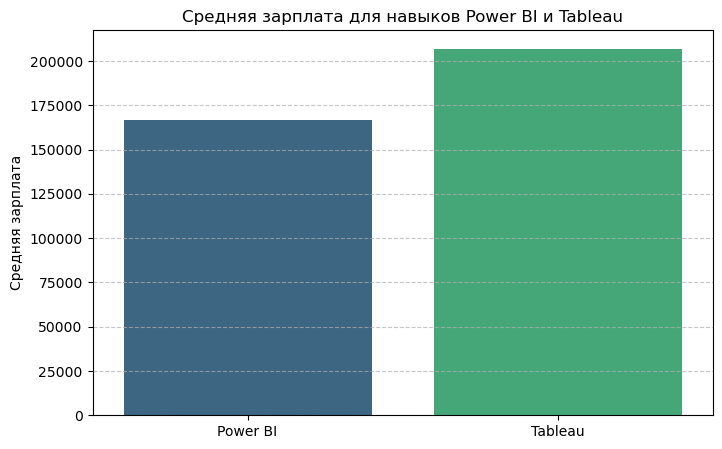

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Фильтрация вакансий с указанными навыками и зарплатой
power_bi = df[df['query_string'].str.contains('Power BI', case=False, na=False) & 
              (df['salary_from'].notna() | df['salary_to'].notna())]
tableau = df[df['query_string'].str.contains('Tableau', case=False, na=False) & 
             (df['salary_from'].notna() | df['salary_to'].notna())]

# Расчет средней зарплаты (берем среднее между from и to)
power_bi['avg_salary'] = (power_bi['salary_from'] + power_bi['salary_to']) / 2
tableau['avg_salary'] = (tableau['salary_from'] + tableau['salary_to']) / 2

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=['Power BI', 'Tableau'], 
            y=[power_bi['avg_salary'].mean(), tableau['avg_salary'].mean()],
            palette='viridis')
plt.title('Средняя зарплата для навыков Power BI и Tableau')
plt.ylabel('Средняя зарплата')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17276\3177811968.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


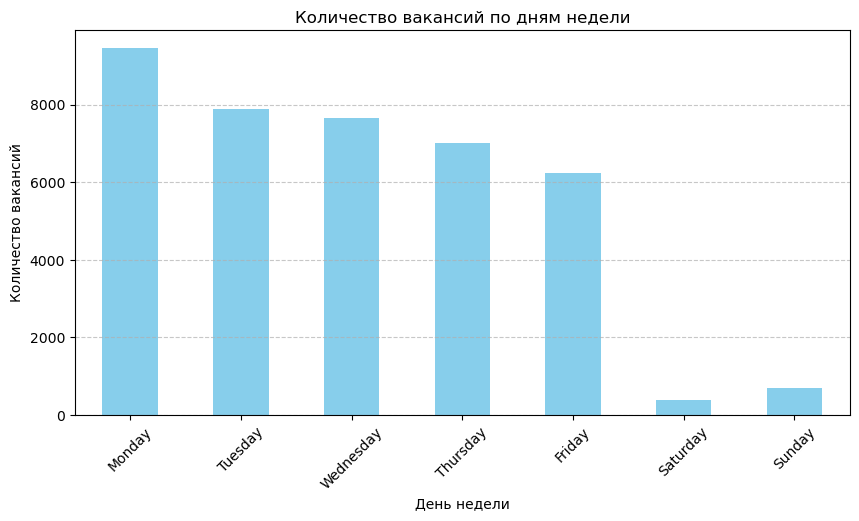

In [8]:
# Преобразуем дату в datetime и извлекаем день недели
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['day_of_week'] = df['published_at'].dt.day_name()

# Подсчет вакансий по дням недели
day_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Визуализация
plt.figure(figsize=(10, 5))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Количество вакансий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

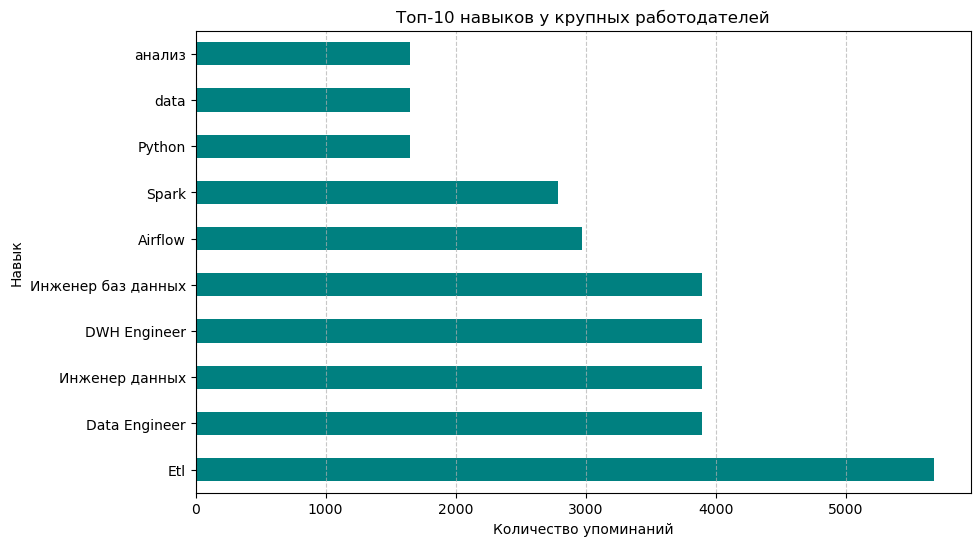

In [9]:
# Определим крупных работодателей (например, с >50 вакансиями)
top_employers = df['employer_name'].value_counts()[df['employer_name'].value_counts() > 50].index

# Фильтруем данные по крупным работодателям
top_employers_data = df[df['employer_name'].isin(top_employers)]

# Извлекаем навыки из query_string (упрощенно)
skills = top_employers_data['query_string'].str.extractall(r'"(.*?)"')[0].value_counts().head(10)

# Визуализация
plt.figure(figsize=(10, 6))
skills.plot(kind='barh', color='teal')
plt.title('Топ-10 навыков у крупных работодателей')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

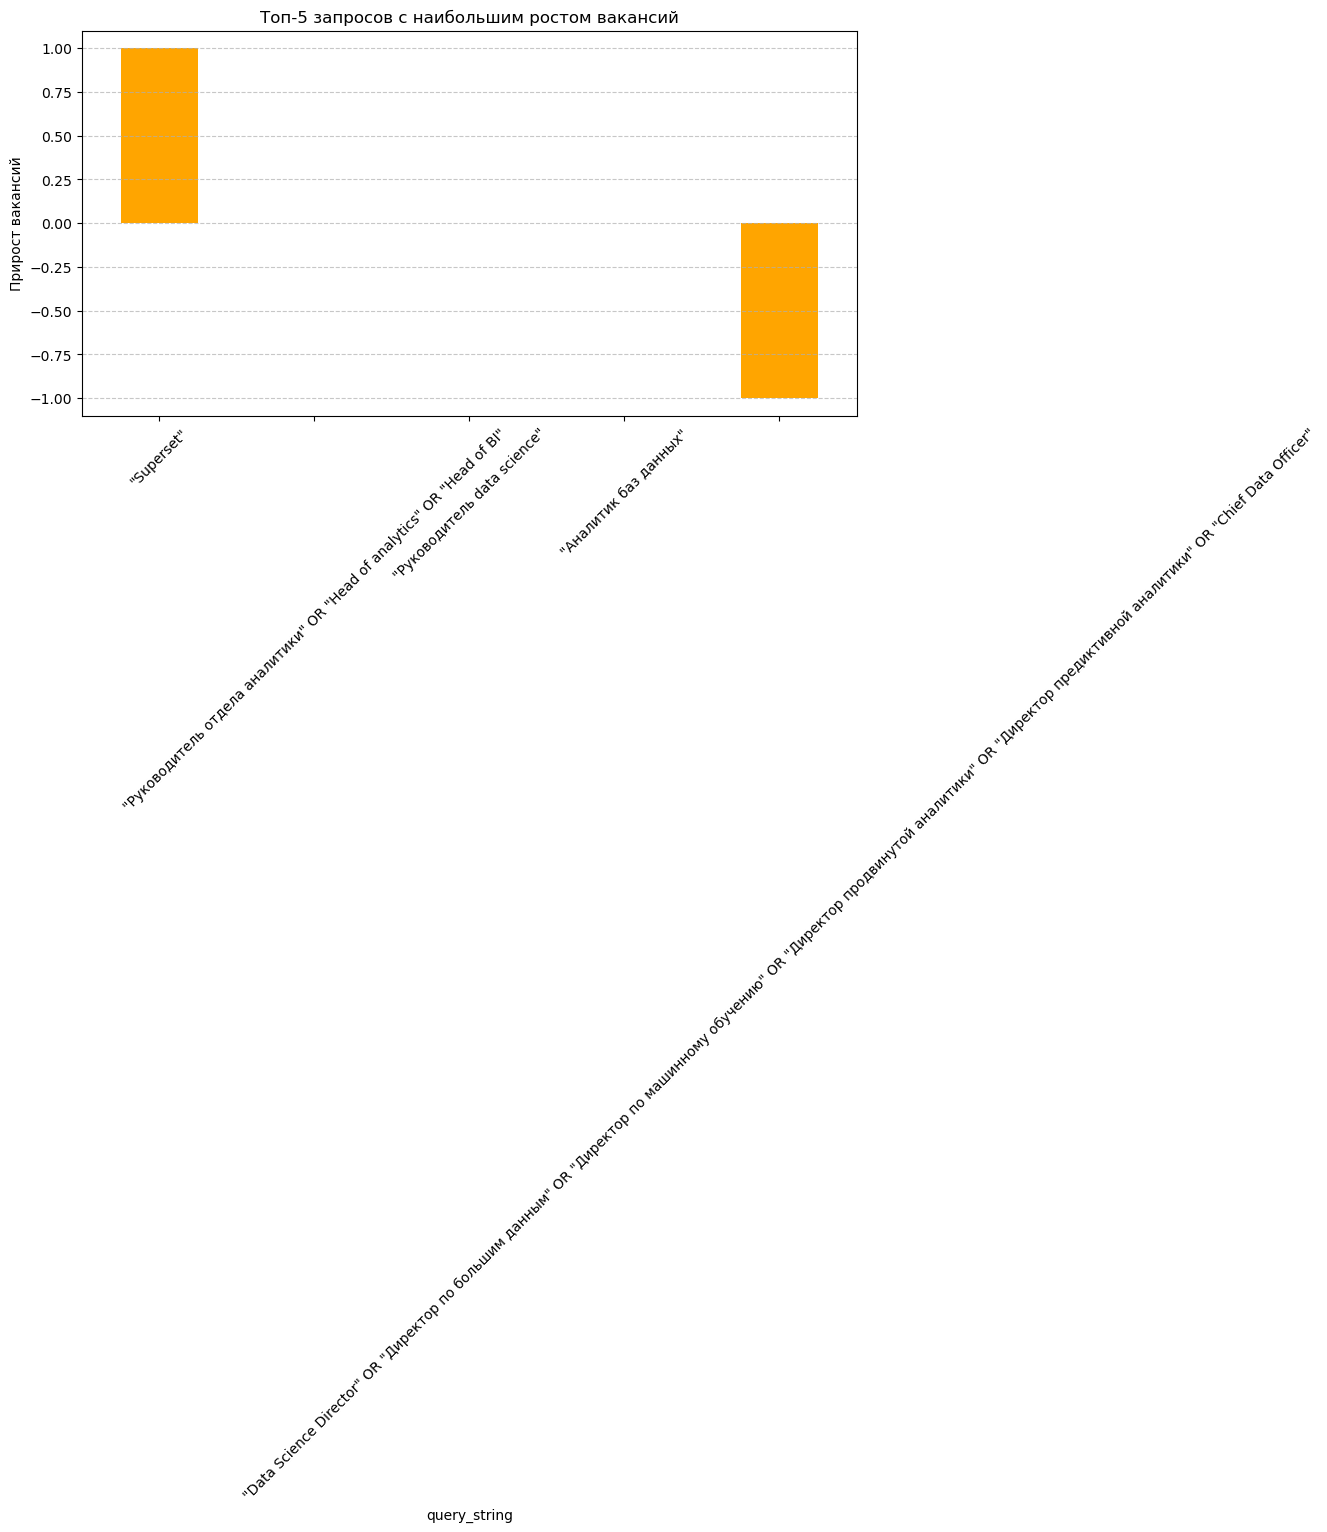

In [10]:
# Группируем по месяцам и запросам
df['month'] = df['published_at'].dt.to_period('M')
trend_data = df.groupby(['month', 'query_string']).size().unstack().fillna(0)

# Выбираем топ-5 запросов с наибольшим ростом
trend_data = trend_data.diff().sum().sort_values(ascending=False).head(5)

# Визуализация
plt.figure(figsize=(10, 5))
trend_data.plot(kind='bar', color='orange')
plt.title('Топ-5 запросов с наибольшим ростом вакансий')
plt.ylabel('Прирост вакансий')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17276\1343679596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_range, x='name', y='salary_range', palette='rocket')


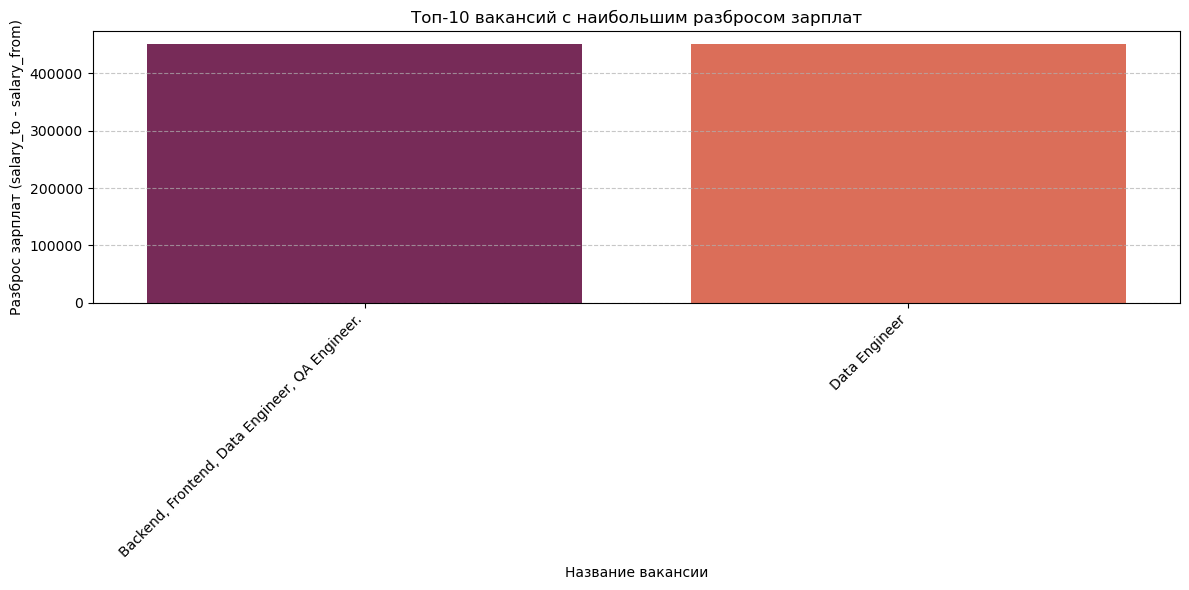

In [11]:
# Фильтруем вакансии с указанной зарплатой
salary_data = df[df['salary_from'].notna() & df['salary_to'].notna()].copy()
salary_data['salary_range'] = salary_data['salary_to'] - salary_data['salary_from']

# Берем топ-10 вакансий с самым большим разбросом
top_range = salary_data.sort_values('salary_range', ascending=False).head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=top_range, x='name', y='salary_range', palette='rocket')
plt.title('Топ-10 вакансий с наибольшим разбросом зарплат')
plt.xlabel('Название вакансии')
plt.ylabel('Разброс зарплат (salary_to - salary_from)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()